# ECS784 - Lab 3 part3
# PANDAS continued

Changes V2.23 10 February 2025:

    * update the way that counts of binned data are generated to stop "Future Warning" message with Pandas 2.2.3
    * call the "plt.show()" Matplotlib function after randframe.boxplot() to ensure boxplot appears in Notebook output

In this notebook we will look at:

    * Drop/remove/replace operations;
    * Data discretisation;
    * Outliers;
    * Sampling;
    * Conditioning/grouping.

In [1]:
# Importing the necessary libraries and set up

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50) # The maximum number of columns that can be shown is 50  CHANGED V2
# Makes the matplotlib graphs appear and stored within the notebook
%matplotlib inline

## Dropping duplicates

Detecting duplicated rows in large datasets may or may not be problematic. Pandas provides tools for handling
duplicate values.

   * The duplicated() function can be applied to a DataFrame to detect rows that might be duplicated.
   * It returns a Series of Booleans where each element corresponds to a dataFrame row, where True indicates that the row is duplicated (this is returned only for duplicated rows and not for the first instance of the row).

In [2]:
# We generate a dataFrame with two columns
dframe = pd.DataFrame({'color': ['white','white','red','red','white'],'value': [2,1,3,3,2]})

In [3]:
dframe

,color,value
0,white,2
1,white,1
2,red,3
3,red,3
4,white,2


In [4]:
# Detecting duplicates

dframe.duplicated()

0    False
1    False
2    False
3     True
4     True
dtype: bool

## Removing duplicates

In [5]:
# This method can be used to return only the duplicated records

dframe[dframe.duplicated()]

,color,value
3,red,3
4,white,2


In [6]:
dframe # Let's print the entire dataFrame again

,color,value
0,white,2
1,white,1
2,red,3
3,red,3
4,white,2


In [7]:
# Now let's pring the same DataFrame without presenting duplicated rows.

dframe.drop_duplicates()

,color,value
0,white,2
1,white,1
2,red,3


# Replacing values

Often the data might contain values that do not meet your needs.
   * For instance, some of the text may be in a foreign language, 
   * may contain unwanted synonyms,
   * may be in the wrong shape,
   * may contain NaN values.
   
In such cases, we can use the replace function to change the values to something more meaningful.

In [8]:
# Creating a dataFrame containing three columns with five values each
frame = pd.DataFrame({ 'item':['ball','mug','pen','pencil','ashtray'],
                               'color':['white','rosso','verde','black','yellow'],
                               'price':[5.56,4.20,1.30,0.56,2.75]})

In [9]:
frame

,item,color,price
0,ball,white,5.56
1,mug,rosso,4.20
2,pen,verde,1.30
3,pencil,black,0.56
4,ashtray,yellow,2.75


In [10]:
# Now we create replacements; e.g., 'rosso' is replaced with 'red' and 'verde' with 'green'

newcolors = {'rosso': 'red','verde': 'green'}

In [11]:
frame.replace(newcolors) # and here we apply the replacements as defined in newcolors

,item,color,price
0,ball,white,5.56
1,mug,red,4.20
2,pen,green,1.30
3,pencil,black,0.56
4,ashtray,yellow,2.75


## Replacing NaN values

In [12]:
# Create a series containing some number and NaN values

ser = pd.Series([1,3,np.nan,4,6,np.nan,3])


In [13]:
ser

0    1.0
1    3.0
2    NaN
3    4.0
4    6.0
5    NaN
6    3.0
dtype: float64

In [14]:
ser.replace(np.nan,0)  # replaces all NaN values with 0

0    1.0
1    3.0
2    0.0
3    4.0
4    6.0
5    0.0
6    3.0
dtype: float64

In [15]:
# let's create a new dataFrame with two columns

frame = pd.DataFrame({ 'item':['ball','mug','pen','pencil','ashtray'],
                               'color':['white','red','green','black','yellow']})

In [16]:
frame

,item,color
0,ball,white
1,mug,red
2,pen,green
3,pencil,black
4,ashtray,yellow


## Adding a new column with reference to existing columns

Let's suppose you want to add a column to indicate the price of each corresponding 'item' (e.g., ball).
Assume you have a price list with the price of each item.
We can define a dictionary object that contains a list of prices for each item, before creating the new column.

In [17]:
# Dictionary as described above
price = {'ball' : 5.56, 'mug' : 4.20, 'bottle' : 1.30, 'scissors' : 3.41, 'pen' : 1.30, 'pencil' : 0.56, 
         'ashtray' :2.75}

In [18]:
price

{'ball': 5.56,
 'mug': 4.2,
 'bottle': 1.3,
 'scissors': 3.41,
 'pen': 1.3,
 'pencil': 0.56,
 'ashtray': 2.75}

## Applying the mapping

Using the map() to create the column.

In [19]:
# Add the new column
frame['price'] = frame['item'].map(price) # map() function takes dictionary 'price' as the argument

In [20]:
frame   # the price column is now added, consistent with the dictionary definitions

,item,color,price
0,ball,white,5.56
1,mug,red,4.20
2,pen,green,1.30
3,pencil,black,0.56
4,ashtray,yellow,2.75


## Discretisation and Binning

Suppose your data contains numerical instead of categorical values


In [21]:
# Let's create a list with some integers
results = [12,34,67,55,28,90,99,12,3,56,74,44,87,23,49,89,87]

Let's assume that we know that the experimental values range between 0 and 100. If we wish to convert the list into categorical values, we can assume uniform intervals for simplicity, such as from 0 to 25, 26 to 50, etc.

In [22]:
# Let's create the bins/intervals

bins = [0,25,50,75,100]

In [23]:
# There is a function called cut() that can be applied to an array/list, to pass the bins.

cat = pd.cut(results, bins)

In [24]:
# The object returned by the cut() function is a special object of Categorical type. You can consider it
# as an array of strings where each string represents a bin. It has the same size as the list.

In [25]:
cat # Note it prints both the bin for each element, as well as the total bins
print(type(cat))
# For example, the first element has bin 0-25, and correspond to the same element in list 'results'

<class 'pandas.core.arrays.categorical.Categorical'>


In [26]:
cat.codes # enumerates the bins starting from 0

array([0, 1, 2, 2, 1, 3, 3, 0, 0, 2, 2, 1, 3, 0, 1, 3, 3], dtype=int8)

In [27]:
# Counting the number of times each bin appears 

# pd.value_counts(cat)  # v2.23 this previous approach now produces warnings, correct way now is to convert cat to a Series first:

pd.Series(cat).value_counts()

(75, 100]    5
(0, 25]      4
(25, 50]     4
(50, 75]     4
Name: count, dtype: int64

# Detecting and removing outliers
Data may contain unwanted outliers.
Note that outliers are not always a problem; e.g., they may be perfectly correct values.

In [28]:
# Create a dataFrame with three columns and 1000 random values each column

np.random.seed(23)  # specify random seed so we get same random numbers each time we run this
randframe = pd.DataFrame(np.random.randn(1000,3))

In [29]:
randframe

,0,1,2
0,0.666988,0.025813,-0.777619
1,0.948634,0.701672,-1.051082
2,-0.367548,-1.137460,-1.322148
3,1.772258,-0.347459,0.670140
4,0.322272,0.060343,-1.043450
...,...,...,...
995,-1.558348,-0.917629,0.028061
996,-0.915296,-1.142277,-0.435002
997,-0.653086,-0.236836,-0.088309
998,1.148408,-1.170962,0.967004


In [30]:
randframe.shape # 1000 rows, 3 columns

(1000, 3)

In [31]:
# Using the describe() function to obtain the summary statistics for each column.

randframe.describe()

,0,1,2
count,1000.000000,1000.000000,1000.000000
mean,-0.064610,-0.069863,0.000499
std,0.989658,1.029623,0.992949
min,-3.394213,-3.129831,-2.940364
25%,-0.717024,-0.795977,-0.640548
50%,-0.079865,-0.085741,0.021569
75%,0.582528,0.630928,0.670485
max,3.032568,3.304207,3.223970


In [32]:
# For this example, we shall consider values greater than three times the standard deviation to be outliers.
# We can use the std() function to obtain the standard deviation for each column.
randframe.std()

0    0.989658
1    1.029623
2    0.992949
dtype: float64

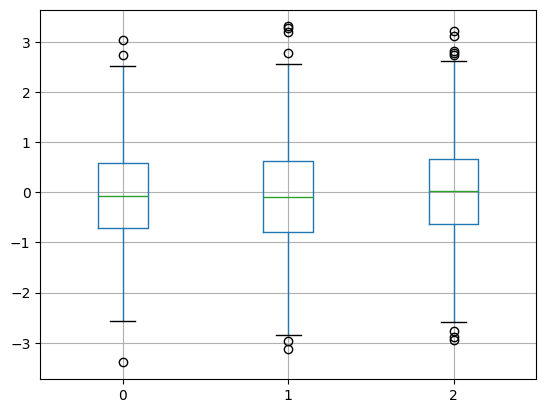

In [33]:
randframe.boxplot() # A boxplot of the three distributions
plt.show()  # v2.23 now needed to for the boxplot to appear in the output

# circle labels can be viewed as outliers
# Pandas boxplot uses the matplotlib boxplox which by default classifies outliers as points 1.5 times further 
# from the interquartile range (shown in the rectangle generated below), so the outliers shown on this plot 
# do not necessarily correspond to the same outliers determined using 3 STD

In [34]:
# Create a dataFrame containing only rows with outliers

# More specifically, where any value differs from the mean by over 
# 3 times more than the standard deviation for the relevant column

# Let's build this code up a bit at a time to see how it is done ....

small = randframe[0:5]  # initially work with 5 rows just to see what is happening more clearly
print('Let\'s just experiment with first five rows:\n{}\n'.format(small))

print('SD of each column is:\n{}\n'.format(    small.std()   ))  # axis=0 default, i.e. computing SD OVER rows, i.e. for column

print('Identify values which are > 1 SD from mean for that column:\n{}\n'
      .format(    small[np.abs(small) > small.std()]     ))  # sees if absolute value is bigger than SD for that column 

print('Identify which rows where any value is > 1 SD for that column:\n{}\n'
      .format(    (small[np.abs(small) > small.std()]).any(axis=1)    ))  # axis = 1 because checking OVER columns. i.e. for row

print('Now select those rows where any value is > 1 SD for that column:\n{}\n'
      .format(    small[(small[np.abs(small) > small.std()]).any(axis=1)]    ))  # 


Let's just experiment with first five rows:
          0         1         2
0  0.666988  0.025813 -0.777619
1  0.948634  0.701672 -1.051082
2 -0.367548 -1.137460 -1.322148
3  1.772258 -0.347459  0.670140
4  0.322272  0.060343 -1.043450

SD of each column is:
0    0.788991
1    0.673425
2    0.792382
dtype: float64

Identify values which are > 1 SD from mean for that column:
          0         1         2
0       NaN       NaN       NaN
1  0.948634  0.701672 -1.051082
2       NaN -1.137460 -1.322148
3  1.772258       NaN       NaN
4       NaN       NaN -1.043450

Identify which rows where any value is > 1 SD for that column:
0    False
1     True
2     True
3     True
4     True
dtype: bool

Now select those rows where any value is > 1 SD for that column:
          0         1         2
1  0.948634  0.701672 -1.051082
2 -0.367548 -1.137460 -1.322148
3  1.772258 -0.347459  0.670140
4  0.322272  0.060343 -1.043450



In [35]:
# do it with complete data frame, and this time look for rows where values are 3 * SD away from mean

outliers = randframe[(randframe[np.abs(randframe) > (3 * randframe.std())]).any(axis=1)]
print('There are {} outliers, the first five being:\n{}'.format(outliers.size, outliers.head()))


There are 24 outliers, the first five being:
            0         1         2
22   0.676860  3.187503 -1.080565
466 -0.576239  3.277400 -0.605668
584 -0.658143 -3.129831  0.254532
657 -3.394213 -0.427890  0.030180
693  3.032568  0.410394 -1.266771


## Random sampling

When you have a huge DataFrame, you may want to sample data from it, rather than using the entire dataFrame.
This can be useful when computational complexity is high.
   * np.random.randint() function.

In [36]:
# Let's create a dataFrame 5x5 with values ordered from 0 to 24

nframe = pd.DataFrame(np.arange(25).reshape(5,5))
nframe


,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


In [37]:
sample = nframe.sample(n=3, replace=False)  # replace  = False guarantees unique rows
sample

,0,1,2,3,4
4,20,21,22,23,24
2,10,11,12,13,14
3,15,16,17,18,19


## Conditioning

We may want to analyse some data conditional on some other data. 
The GroupBy method can be used for this purpose.

In [38]:
# We define a DataFrame containing both numeric and string values:
    
frame = pd.DataFrame({ 'colour': ['white','red','green','red','green'],
                      'object': ['pen','pencil','pencil','ashtray','pen'],
                      'price1' : [5.56,4.20,1.30,0.56,2.75],
                      'price2' : [4.75,4.12,1.60,0.75,3.15]})

In [39]:
frame

,colour,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [40]:
# What if we want to calculate the average value of 'price1' conditional on colour?
# There are several ways of doing this.

In [41]:
group = frame['price1'].groupby(frame['colour'])

In [42]:
# The above operation involves grouping price1 by colour.
# The function groups of the GroupBy object returns this information.

group.groups

{'green': [2, 4], 'red': [1, 3], 'white': [0]}

In [43]:
# Each group is listed explicitly specifying the data rows corresponding to each colour.

Now we can apply different operations to obtain results for each individual group:

In [44]:
group.sum()

colour
green    4.05
red      4.76
white    5.56
Name: price1, dtype: float64

In [45]:
group.mean()

colour
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

# Multiple conditions

In [46]:
# We can extend this process to multiple conditions/groups.
# We will now group price1 by colour and object:

ggroup = frame['price1'].groupby([frame['colour'],frame['object']])

In [47]:
ggroup.groups # Each group of conditions is listed explicitly, specifying the data rows corresponding to those conditions.

{('green', 'pen'): [4], ('green', 'pencil'): [2], ('red', 'ashtray'): [3], ('red', 'pencil'): [1], ('white', 'pen'): [0]}

In [48]:
ggroup.sum()

colour  object 
green   pen        2.75
        pencil     1.30
red     ashtray    0.56
        pencil     4.20
white   pen        5.56
Name: price1, dtype: float64

In [49]:
# So far we have applied conditioning to a single data column. 
# The same process can be extended to multiple columns.

In [50]:
# Let's have another look at the dataFrame frame

frame

,colour,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [51]:
# Two groups conditional on colour

frame[['price1','price2']].groupby(frame['colour']).mean()

,price1,price2
colour,,
green,2.025,2.375
red,2.380,2.435
white,5.560,4.750
